<a href="https://colab.research.google.com/github/nikhil2020/NYC_Project/blob/master/NYC_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: 311 NYC service request. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import os
os.chdir('/content/drive/My Drive/Datasets/311_New_York_Calls')

In [4]:
ls

 311_Service_Requests_from_2010_to_Present.csv
 311-service-requests-nyc.zip
'311-service-requests-nyc.zip (Unzipped Files)'/


# Importing the NYC Dataset 

In [6]:
data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [7]:
data.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [8]:
# Converting the Date columns into the datetime datatypes
data['Closed Date'] = pd.to_datetime(data['Closed Date'])
data['Created Date'] = pd.to_datetime(data['Created Date'])

In [9]:
data.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [10]:

import datetime as dt

In [11]:
# Renaming the Created Date and Closed Date to Created_Date and Closed_Date
data.rename(columns={'Created Date': 'Created_Date','Closed Date':'Closed_Date','Complaint Type':'Complaint_Type','Location Type':'Location_Type'},inplace =True)

In [12]:
# The time elapsed betweeen the Created_Date and Closed_Date in seconds
time_elapsed = (data.Created_Date - data.Closed_Date).dt.total_seconds()

In [13]:
# The time in absolute as time can't be negative
t = abs(time_elapsed)

In [14]:
# Creating the new column Request_closed time in the dataset
data['Request_Closing_Time'] = t

In [15]:
data.head()

,Unique Key,Created_Date,Closed_Date,Agency,Agency Name,Complaint_Type,Descriptor,Location_Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5233.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17494.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27927.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12464.0


# Data Understanding and Exploration

Here we are exploration and understanding the dataset
and finding the meaningful information from the dataset

#### indo() is gives the information of structure of the dataset
#### like how many rows and columns is in the dataset which variable
#### is having the null value and what is the datatype of each variables


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      364558 non-null  int64         
 1   Created_Date                    364558 non-null  datetime64[ns]
 2   Closed_Date                     362177 non-null  datetime64[ns]
 3   Agency                          364558 non-null  object        
 4   Agency Name                     364558 non-null  object        
 5   Complaint_Type                  364558 non-null  object        
 6   Descriptor                      358057 non-null  object        
 7   Location_Type                   364425 non-null  object        
 8   Incident Zip                    361560 non-null  float64       
 9   Incident Address                312859 non-null  object        
 10  Street Name                     312859 non-null  object 

#### Describe() gives the information of the statistic of each numerical variable
#### like no. of count,mean of the column, standard deviation and min value
#### 1st Quartile,2nd Quartile and 3rd Quartile and max value to see the insight of the dataset


In [17]:
data.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude,Request_Closing_Time
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000,3.621770e+05
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946,1.511330e+04
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213,2.110255e+04
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937,6.100000e+01
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253,4.533000e+03
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643,9.616000e+03
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098,1.887800e+04
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715,2.134342e+06


In [18]:
# head gives the top five rows how the dataset looks like
data.head()

,Unique Key,Created_Date,Closed_Date,Agency,Agency Name,Complaint_Type,Descriptor,Location_Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5233.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17494.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27927.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12464.0


In [19]:
# columns gives the name of each variables in the dataset
data.columns

Index(['Unique Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [20]:
# nunique() counts the no. of unique values in the columns
data.nunique()

Unique Key                        364558
Created_Date                      362018
Closed_Date                       339837
Agency                                 1
Agency Name                            3
Complaint_Type                        24
Descriptor                            45
Location_Type                         18
Incident Zip                         201
Incident Address                  126372
Street Name                         7693
Cross Street 1                      6234
Cross Street 2                      6064
Intersection Street 1               4704
Intersection Street 2               4422
Address Type                           5
City                                  53
Landmark                             120
Facility Type                          1
Status                                 4
Due Date                          362015
Resolution Description                18
Resolution Action Updated Date    340833
Community Board                       75
Borough         

In [ ]:
# sns.swarmplot(x="Agency Name", y="Request_Closing_Time", data=data)

#### Correlation heatmap show  the relation between the numerical variables
#### Here in this map states thatn the location are highly corelated with each other


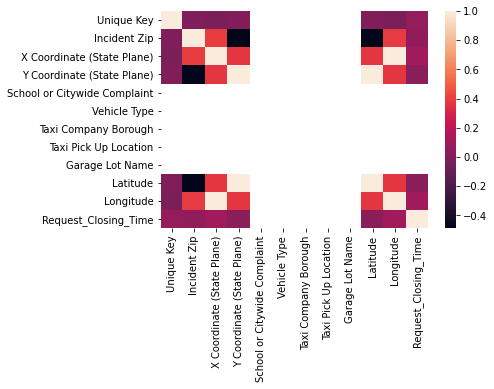

In [21]:
sns.heatmap(data.corr())

In [22]:
# How many null values contains in each variables
data.isnull().sum()

Unique Key                             0
Created_Date                           0
Closed_Date                         2381
Agency                                 0
Agency Name                            0
Complaint_Type                         0
Descriptor                          6501
Location_Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [23]:
data.head()

,Unique Key,Created_Date,Closed_Date,Agency,Agency Name,Complaint_Type,Descriptor,Location_Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5233.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17494.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27927.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12464.0


In [24]:
# pivot table to show the relation between Complaint Type and Agengy type with Request Closing Time
pv = data.pivot_table(values='Request_Closing_Time',index='Complaint_Type',columns='Agency Name')

## Analysis of  pivot table heatmap 
#### heatmap plot show that Animal in a Park has the highest complaint through New york city police Department at request closing time above 1000000
#### MOst of the complaint is coming through New York city police with an request closing time of 250000 seconds
#### Blocked Driveway complaint is comes from NYPD with request closing time of 250000 seconds
#### Agency Issues complaint is comes from NYPD with request closing time of 250000 seconds


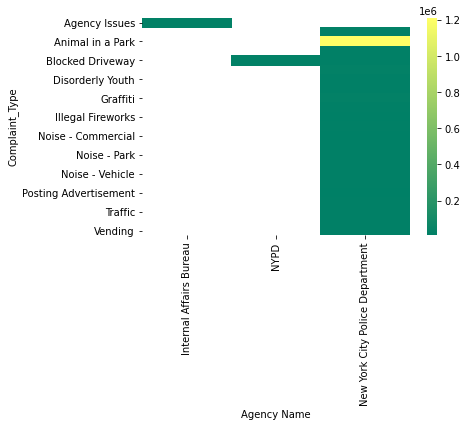

In [25]:
sns.heatmap(pv,cmap = 'summer')

# Order the complaint types based on the average ‘Request_Closing_Time’ grouping them for different locations.


In [26]:
d = data[['Complaint_Type','Request_Closing_Time','Location','Location_Type','Incident Address']]
d.head()

,Complaint_Type,Request_Closing_Time,Location,Location_Type,Incident Address
0,Noise - Street/Sidewalk,3330.0,"(40.86568153633767, -73.92350095571744)",Street/Sidewalk,71 VERMILYEA AVENUE
1,Blocked Driveway,5233.0,"(40.775945312321085, -73.91509393898605)",Street/Sidewalk,27-07 23 AVENUE
2,Blocked Driveway,17494.0,"(40.870324522111424, -73.88852464418646)",Street/Sidewalk,2897 VALENTINE AVENUE
3,Illegal Parking,27927.0,"(40.83599404683083, -73.82837939584206)",Street/Sidewalk,2940 BAISLEY AVENUE
4,Illegal Parking,12464.0,"(40.733059618956815, -73.87416975810375)",Street/Sidewalk,87-14 57 ROAD


In [27]:
location_based=d.groupby(['Location_Type','Incident Address','Complaint_Type','Location'],as_index = True).mean()

### Different Location Based groupby with complaint type on the bases of aVerage Request closing time

In [28]:

location_based.head(30)

Request_Closing_Time
Location_Type       Incident Address         Complaint_Type     Location                                                      
Club/Bar/Restaurant 1 AVENUE                 Noise - Commercial (40.723586990296035, -73.98820272801426)           6725.000000
                                                                (40.72728112699584, -73.98551777527184)            1607.000000
                                                                (40.75929883744741, -73.9621996109738)             1784.000000
                                                                (40.77070570077645, -73.95388226861742)            6279.000000
                                                                (40.77460754303029, -73.95103088743048)           17314.333333
                                                                (40.77524412627464, -73.9505718823054)             2658.000000
                    1 BAY CLUB DRIVE         Noise - Commercial (40.779012083546895, -73.78208491752011)           1457.000000
                    1 BEDFORD AVENUE         Noise - Commercial (40.72400263455818, -73.95106807164736)           11479.000000
                    1 BENNETT AVENUE         Noise - Commercial (40.850728062663016, -73.93650911771923)           9518.000000
                    1 CHURCH STREET          Noise - Commercial (40.70978635563814, -74.01159644552898)            9547.000000
                    1 DOWNING STREET         Noise - Commercial (40.729683669819636, -74.00260141017563)          34886.000000
                    1 EAST 184 STREET        Noise - Commercial (40.8605385231975, -73.90240518642987)            12962.000000
                    1 EAST 67 STREET         Noise - Commercial (40.76917648218226, -73.96911836496761)           13733.000000
                    1 FDR FOUR FREEDOMS PARK Noise - Commercial (40.75146432780528, -73.95925169945215)            3506.000000
                    1 LITTLE WEST 12 STREET  Noise - Commercial (40.73945486717447, -74.00597582111745)           16817.000000
                    1 LUDLOW STREET          Noise - Commercial (40.71457895713592, -73.99119111783705)            2662.000000
                    1 MARGARET CORBIN DRIVE  Noise - Commercial (40.860900383158516, -73.93247571308034)          15686.500000
                    1 NAGLE AVENUE           Noise - Commercial (40.85932419390543, -73.93123733660875)           18413.302469
                    1 NELSON AVENUE          Noise - Commercial (40.54983696336894, -74.15079600753874)            5181.333333
                    1 PENN PLAZA             Noise - Commercial (40.75065872876379, -73.99087595619766)            8251.000000
                    1 SOUTH OXFORD STREET    Noise - Commercial (40.689310796391844, -73.97403049606427)           9868.000000
                    1 STATION SQUARE         Noise - Commercial (40.71924029726528, -73.84532504397058)            6791.666667
                    1 TENNIS PLACE           Noise - Commercial (40.719006004974794, -73.84663871262093)            482.000000
                    1 WEST 35 STREET         Noise - Commercial (40.749302146077014, -73.9845313071452)            4210.000000
                    10 AKRON STREET          Drinking           (40.61173799306301, -74.15883073802867)           15806.000000
                    10 AVENUE                Noise - Commercial (40.76123719758523, -73.99430017671288)           13813.000000
                                                                (40.86227061005415, -73.9205259107025)             9990.500000
                    10 DELANCEY STREET       Drinking           (40.72016744276424, -73.99351002956226)           27184.000000
                    10 DESBROSSES STREET     Noise - Commercial (40.72335396551203, -74.00864769481181)            1864.000000
                    10 DOWNING STREET        Noise - Commercial (40.72959583237184, -74.00282510607859)           11564.423077

# Hypothesis Testing

Perform statistical test for the following:
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p value’.
Whether the average response time across complaint types are similar or not (overall)
Is the type of complaint or service requested and location related?


## Hypothesis for First Statement:-
Null Hypothesis : The average response time across complaint types are simliar
#Alternate Hypothesis : The average response time across complaint types are not same

In [30]:
data.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude,Request_Closing_Time
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000,3.621770e+05
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946,1.511330e+04
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213,2.110255e+04
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937,6.100000e+01
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253,4.533000e+03
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643,9.616000e+03
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098,1.887800e+04
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715,2.134342e+06


In [29]:
# Importing the stats model ols
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:
#variable ~ treatment
mod = ols('Request_Closing_Time~Complaint_Type', data=data).fit()



In [37]:
data.Request_Closing_Time.isnull().sum()

0

In [38]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data[['Request_Closing_Time' ]]=imputer.fit_transform(data[['Request_Closing_Time' ]])


In [39]:
data.Request_Closing_Time.isnull().sum()

0

In [40]:
# Summary of the anova test
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Request_Closing_Time   R-squared:                       0.033
Model:                              OLS   Adj. R-squared:                  0.033
Method:                   Least Squares   F-statistic:                     565.3
Date:                  Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                          13:13:35   Log-Likelihood:            -4.1140e+06
No. Observations:                362177   AIC:                         8.228e+06
Df Residuals:                    362154   BIC:                         8.228e+06
Df Model:                            22                                         
Covariance Type:              nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                    1.829e+04   7336.210      2.493      0.013    3910.369    3.27e+04
Complaint_Type[T.Animal Abuse]               -256.5690   7338.997     -0.035      0.972   -1.46e+04    1.41e+04
Complaint_Type[T.Animal in a Park]           1.194e+06    2.2e+04     54.267      0.000    1.15e+06    1.24e+06
Complaint_Type[T.Bike/Roller/Skate Chronic] -5165.4366   7397.731     -0.698      0.485   -1.97e+04    9333.898
Complaint_Type[T.Blocked Driveway]          -2056.6035   7336.502     -0.280      0.779   -1.64e+04    1.23e+04
Complaint_Type[T.Derelict Vehicle]           7070.4751   7337.574      0.964      0.335   -7310.954    2.15e+04
Complaint_Type[T.Disorderly Youth]          -5925.3758   7428.785     -0.798      0.425   -2.05e+04    8634.823
Complaint_Type[T.Drinking]                  -4467.8244   7357.082     -0.607      0.544   -1.89e+04    9951.839
Complaint_Type[T.Ferry Complaint]            6.939e-10   6.48e-11     10.712      0.000    5.67e-10    8.21e-10
Complaint_Type[T.Graffiti]                   4987.2189   7520.798      0.663      0.507   -9753.324    1.97e+04
Complaint_Type[T.Homeless Encampment]       -2837.7405   7342.222     -0.386      0.699   -1.72e+04    1.16e+04
Complaint_Type[T.Illegal Fireworks]         -8175.6424   7504.881     -1.089      0.276   -2.29e+04    6533.703
Complaint_Type[T.Illegal Parking]           -2638.6893   7336.530     -0.360      0.719    -1.7e+04    1.17e+04
Complaint_Type[T.Noise - Commercial]        -7203.3645   7336.881     -0.982      0.326   -2.16e+04    7176.706
Complaint_Type[T.Noise - House of Worship]  -6898.0379   7363.636     -0.937      0.349   -2.13e+04    7534.471
Complaint_Type[T.Noise - Park]              -6063.0695   7343.383     -0.826      0.409   -2.05e+04    8329.746
Complaint_Type[T.Noise - Street/Sidewalk]   -6057.8296   7336.784     -0.826      0.409   -2.04e+04    8322.051
Complaint_Type[T.Noise - Vehicle]           -5727.3250   7337.731     -0.781      0.435   -2.01e+04    8654.411
Complaint_Type[T.Panhandling]               -2435.5742   7425.953     -0.328      0.743    -1.7e+04    1.21e+04
Complaint_Type[T.Posting Advertisement]       -1.1e+04   7379.302     -1.491      0.136   -2.55e+04    3460.345
Complaint_Type[T.Squeegee]                  -3728.8750   1.27e+04     -0.293      0.769   -2.86e+04    2.12e+04
Complaint_Type[T.Traffic]                   -5980.0049   7341.856     -0.815      0.415   -2.04e+04    8409.816
Complaint_Type[T.Urinating in Public]       -5329.8317   7381.848     -0.722      0.470   -1.98e+04    9138.373
Complaint_Type[T.Vending]                   -3922.8466   7343.219     -0.534      0.593   -1.83e+04    1.05e+04
=====================================

In [41]:
aov_table = sm.stats.anova_lm(mod)

In [43]:
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Complaint_Type,23.0,5.354568e+12,2.328073e+11,540.708285,0.0
Residual,362154.0,1.559290e+14,4.305599e+08,NaN,NaN


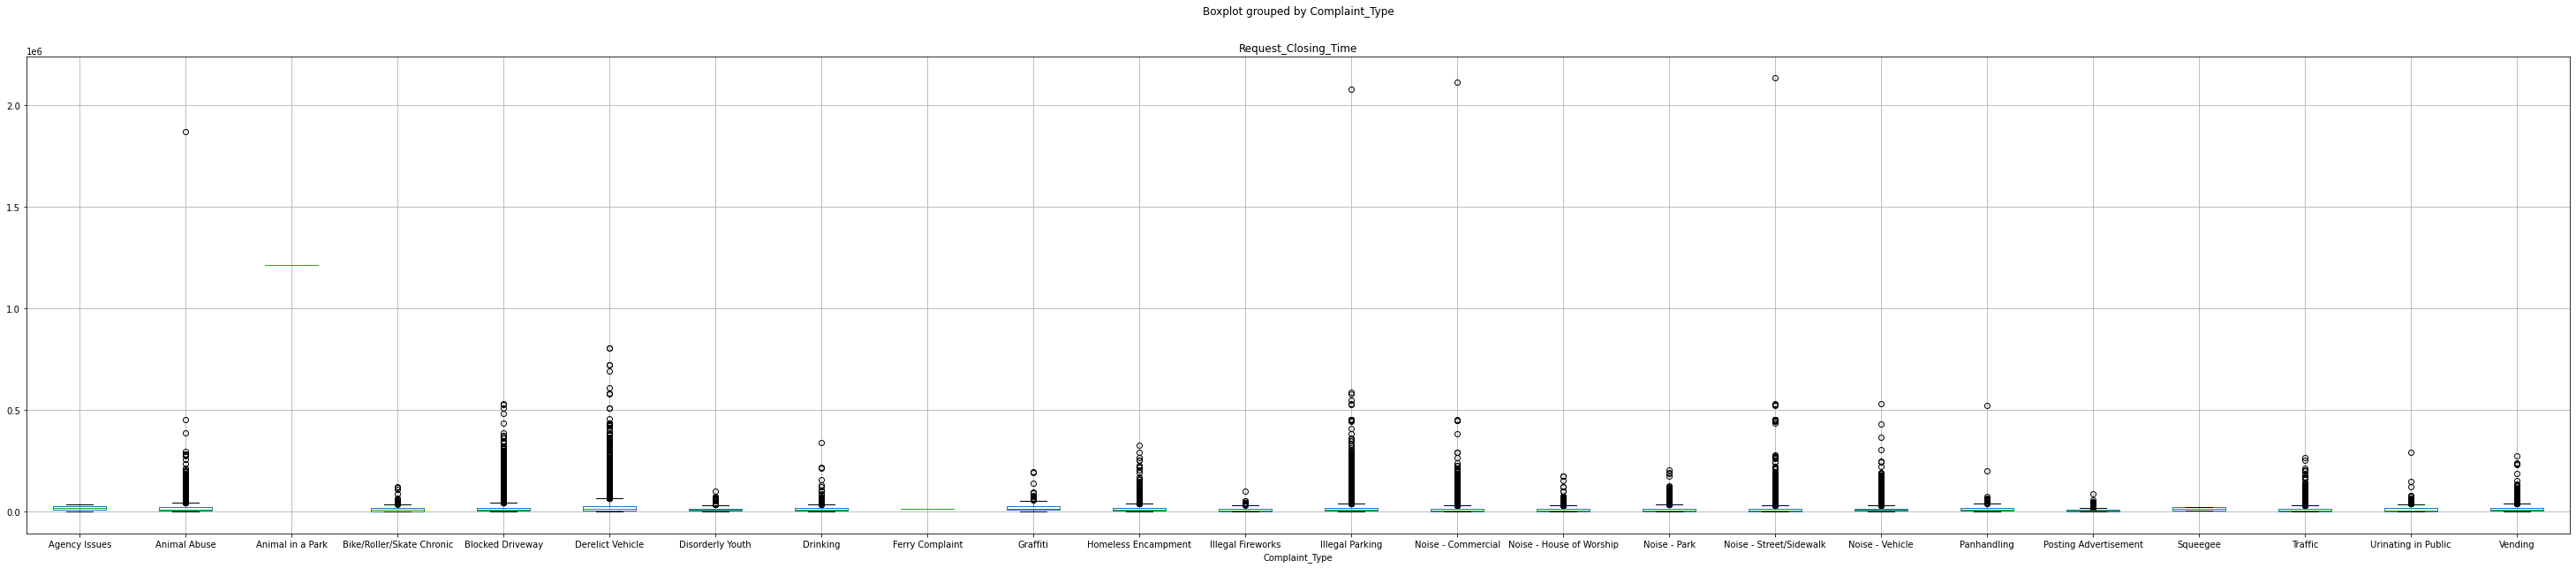

In [44]:
# double click for zoom the plot show the variance relation between  Request closing time and complaint type
data.boxplot('Request_Closing_Time',by = 'Complaint_Type',figsize = (50,10),rot =0)

In [45]:
# Tukey method show 

In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [47]:
tukey = pairwise_tukeyhsd(data.Request_Closing_Time, data.Complaint_Type, alpha = 0.05)

In [48]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Agency Issues,Animal Abuse,-259.6153,0.9,-26869.5281,26350.2974,False
Agency Issues,Animal in a Park,1194344.875,0.001,1114545.4125,1274144.3375,True
Agency Issues,Bike/Roller/Skate Chronic,-5152.9495,0.9,-31974.4393,21668.5404,False
Agency Issues,Blocked Driveway,-2059.4548,0.9,-28660.3303,24541.4208,False
Agency Issues,Derelict Vehicle,7002.8318,0.9,-19601.9006,33607.5642,False
Agency Issues,Disorderly Youth,-5925.3758,0.9,-32860.8543,21010.1028,False
Agency Issues,Drinking,-4463.2396,0.9,-31138.4676,22211.9884,False
Agency Issues,Ferry Complaint,-3175.8254,0.9,-62654.833,56303.1822,False
Agency Issues,Graffiti,4987.2189,0.9,-22281.8844,32256.3223,False
Agency Issues,Homeless Encampment,-2837.7405,0.9,-29459.36,23783.879,False


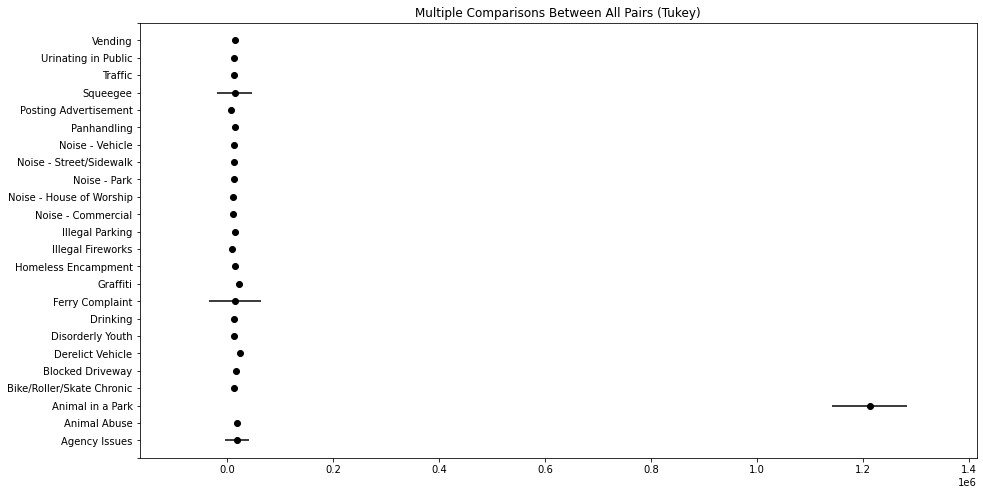

In [49]:
# Plot show the variance of the complaint type is similar with respective to Request closing time
tukey.plot_simultaneous(figsize = (15,8))
plt.show()

By tukey method show the null hypothesis is accepted as there is similar average request closing time to the Complaint type


# #Is the type of complaint or service requested and location related?
Null Hypothesis : The type of Complaint or service requested are 
    related to the location.

Alternate Hypothesis : The type of Complaint or service requested are
    not related to the location.

In [50]:
contigency_table = pd.crosstab(data.Complaint_Type,data.Location_Type)
contigency_table

Location_Type,Bridge,Club/Bar/Restaurant,Commercial,Ferry,Highway,House and Store,House of Worship,Park,Park/Playground,Parking Lot,Residential Building,Residential Building/House,Roadway Tunnel,Store/Commercial,Street/Sidewalk,Subway Station,Terminal,Vacant Lot
Complaint_Type,,,,,,,,,,,,,,,,,,
Animal Abuse,0,0,108,0,0,245,0,0,144,160,533,6727,0,717,1878,26,0,0
Animal in a Park,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,0,0,0,0,0,0,0,0,0,0,32,0,60,386,0,0,0
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100844,0,0,0
Derelict Vehicle,0,0,0,0,19,0,0,0,0,0,0,0,8,0,21531,0,0,95
Disorderly Youth,0,0,0,0,0,0,0,0,0,0,0,93,0,10,212,0,0,0
Drinking,0,458,0,0,0,0,0,0,99,0,0,298,0,96,457,0,0,0
Ferry Complaint,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Graffiti,0,0,0,0,0,0,0,0,0,0,0,73,0,51,33,0,0,0


In [51]:
import pandas as pd
import scipy.stats as stats
from math import sqrt

In [52]:
print(stats.chi2_contingency(contigency_table))

(2000239.4074142207, 0.0, 374, array([[5.78335734e-02, 6.22491668e+02, 3.12301297e+00, 2.89167867e-02,
        7.66294848e+00, 7.08461275e+00, 3.08831282e+01, 2.89167867e-02,
        1.40853668e+02, 4.82910338e+00, 1.54126473e+01, 2.56462981e+02,
        1.24342183e+00, 7.29194611e+02, 8.71470985e+03, 1.15667147e+00,
        2.89167867e-02, 2.74709474e+00],
       [5.48809769e-06, 5.90711395e-02, 2.96357275e-04, 2.74404884e-06,
        7.27172944e-04, 6.72291967e-04, 2.93064417e-03, 2.74404884e-06,
        1.33662619e-02, 4.58256157e-04, 1.46257803e-03, 2.43369692e-02,
        1.17994100e-04, 6.91966797e-02, 8.26979488e-01, 1.09761954e-04,
        2.74404884e-06, 2.60684640e-04],
       [2.62331069e-03, 2.82360047e+01, 1.41658778e-01, 1.31165535e-03,
        3.47588667e-01, 3.21355560e-01, 1.40084791e+00, 1.31165535e-03,
        6.38907320e+00, 2.19046443e-01, 6.99112300e-01, 1.16330713e+01,
        5.64011799e-02, 3.30760129e+01, 3.95296195e+02, 5.24662139e-02,
        1.31165535e-03,

In [53]:
chi_square , p_value, degrees_of_freedom, expected_frequencies = stats.chi2_contingency(contigency_table)

In [54]:
chi_square, p_value

(2000239.4074142207, 0.0)

In [55]:
chi_square

2000239.4074142207

In [56]:
p_value

0.0

In [57]:
degrees_of_freedom

374

In [58]:
expected_frequencies

array([[5.78335734e-02, 6.22491668e+02, 3.12301297e+00, 2.89167867e-02,
        7.66294848e+00, 7.08461275e+00, 3.08831282e+01, 2.89167867e-02,
        1.40853668e+02, 4.82910338e+00, 1.54126473e+01, 2.56462981e+02,
        1.24342183e+00, 7.29194611e+02, 8.71470985e+03, 1.15667147e+00,
        2.89167867e-02, 2.74709474e+00],
       [5.48809769e-06, 5.90711395e-02, 2.96357275e-04, 2.74404884e-06,
        7.27172944e-04, 6.72291967e-04, 2.93064417e-03, 2.74404884e-06,
        1.33662619e-02, 4.58256157e-04, 1.46257803e-03, 2.43369692e-02,
        1.17994100e-04, 6.91966797e-02, 8.26979488e-01, 1.09761954e-04,
        2.74404884e-06, 2.60684640e-04],
       [2.62331069e-03, 2.82360047e+01, 1.41658778e-01, 1.31165535e-03,
        3.47588667e-01, 3.21355560e-01, 1.40084791e+00, 1.31165535e-03,
        6.38907320e+00, 2.19046443e-01, 6.99112300e-01, 1.16330713e+01,
        5.64011799e-02, 3.30760129e+01, 3.95296195e+02, 5.24662139e-02,
        1.31165535e-03, 1.24607258e-01],
       [5.534

Here from the above observation we state that null hypothesis is accepted as there is relation between 
complaint type and location